# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | po
City not found. Skipping...
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | berezovyy
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | kilimatinde
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | egersund
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | caxito
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | edinburgh of the seven s

Processing Record 41 of Set 4 | shahrud
Processing Record 42 of Set 4 | kosong
Processing Record 43 of Set 4 | gordonvale
Processing Record 44 of Set 4 | les anglais
Processing Record 45 of Set 4 | hayma'
City not found. Skipping...
Processing Record 46 of Set 4 | atafu village
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | wotje
Processing Record 49 of Set 4 | kirkwall
Processing Record 0 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 1 of Set 5 | pemangkat
Processing Record 2 of Set 5 | bargara
City not found. Skipping...
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | ilulissat
Processing Record 5 of Set 5 | hammerfest
Processing Record 6 of Set 5 | cozumel
Processing Record 7 of Set 5 | shouguang
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | kailua-kona
Processing Record 10 of Set 5 | nyrob
Processing Record 11 of Set 5 | nar'yan-mar
Processing Record 12 of Set 5 | zorya
P

Processing Record 32 of Set 8 | alofi
Processing Record 33 of Set 8 | baiti
Processing Record 34 of Set 8 | buena vista
Processing Record 35 of Set 8 | scottburgh
Processing Record 36 of Set 8 | madang
Processing Record 37 of Set 8 | nellore
Processing Record 38 of Set 8 | keflavik
Processing Record 39 of Set 8 | qarayeri
Processing Record 40 of Set 8 | asadabad
Processing Record 41 of Set 8 | nichinan
Processing Record 42 of Set 8 | conception bay south
Processing Record 43 of Set 8 | salinopolis
Processing Record 44 of Set 8 | mejit
Processing Record 45 of Set 8 | kendari
Processing Record 46 of Set 8 | yazoo city
Processing Record 47 of Set 8 | manggar
Processing Record 48 of Set 8 | tubarjal
Processing Record 49 of Set 8 | mount isa
Processing Record 0 of Set 9 | linxia chengguanzhen
Processing Record 1 of Set 9 | am djarass
City not found. Skipping...
Processing Record 2 of Set 9 | yagry
City not found. Skipping...
Processing Record 3 of Set 9 | mossel bay
Processing Record 4 of S

Processing Record 18 of Set 12 | santa vitoria do palmar
Processing Record 19 of Set 12 | auki
Processing Record 20 of Set 12 | malindi
City not found. Skipping...
Processing Record 21 of Set 12 | pangody
Processing Record 22 of Set 12 | tamanrasset
Processing Record 23 of Set 12 | koneurgench
City not found. Skipping...
Processing Record 24 of Set 12 | aroma
Processing Record 25 of Set 12 | mantsala
Processing Record 26 of Set 12 | sosnovoborsk
Processing Record 27 of Set 12 | dossor
Processing Record 28 of Set 12 | termas de rio hondo
Processing Record 29 of Set 12 | kolonia town
Processing Record 30 of Set 12 | meadow lakes
Processing Record 31 of Set 12 | alotau
City not found. Skipping...
Processing Record 32 of Set 12 | faridpur
Processing Record 33 of Set 12 | mankato
Processing Record 34 of Set 12 | port hedland
Processing Record 35 of Set 12 | port shepstone
Processing Record 36 of Set 12 | shiraoi
Processing Record 37 of Set 12 | valpoy
Processing Record 38 of Set 12 | parade

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-20.15,65,75,6.17,CA,1707345107
1,port-aux-francais,-49.3500,70.2167,4.73,75,94,12.78,TF,1707345108
2,berezovyy,51.6667,135.7000,-17.40,98,100,0.58,RU,1707345109
3,lebu,-37.6167,-73.6500,14.91,73,99,9.44,CL,1707345109
4,kilimatinde,-5.8500,34.9500,18.47,93,7,1.01,TZ,1707345110


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-20.15,65,75,6.17,CA,1707345107
1,port-aux-francais,-49.3500,70.2167,4.73,75,94,12.78,TF,1707345108
2,berezovyy,51.6667,135.7000,-17.40,98,100,0.58,RU,1707345109
3,lebu,-37.6167,-73.6500,14.91,73,99,9.44,CL,1707345109
4,kilimatinde,-5.8500,34.9500,18.47,93,7,1.01,TZ,1707345110


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

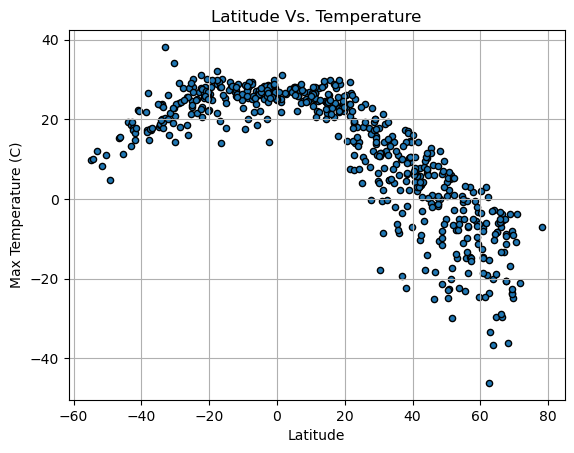

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

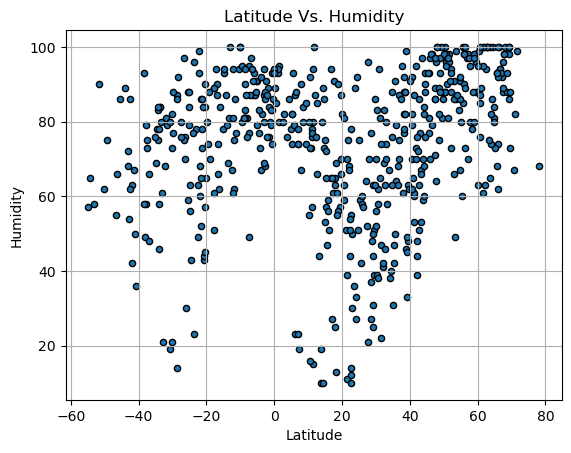

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

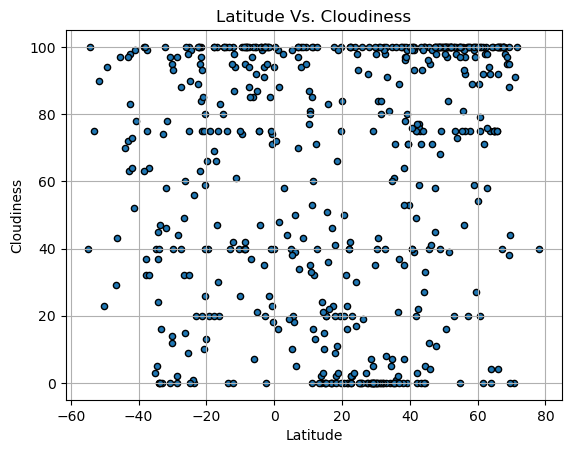

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

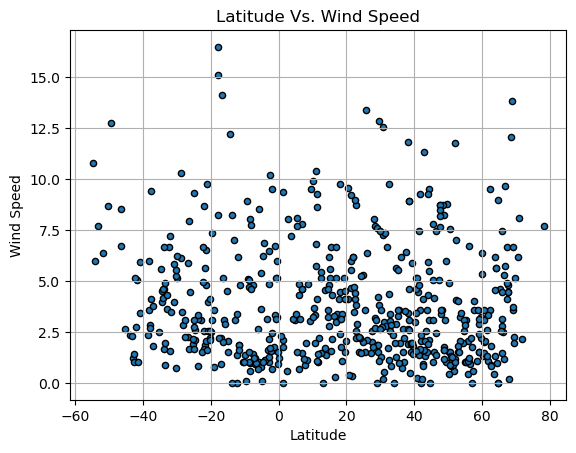

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-20.15,65,75,6.17,CA,1707345107
2,berezovyy,51.6667,135.7000,-17.40,98,100,0.58,RU,1707345109
6,enewetak,11.3474,162.3373,26.69,80,100,8.66,MH,1707345111
7,stanley,54.8680,-1.6985,-0.82,91,0,1.03,GB,1707345112
9,egersund,58.4513,5.9997,-0.51,78,89,1.10,NO,1707345113


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.73,75,94,12.78,TF,1707345108
3,lebu,-37.6167,-73.6500,14.91,73,99,9.44,CL,1707345109
4,kilimatinde,-5.8500,34.9500,18.47,93,7,1.01,TZ,1707345110
5,pisco,-13.7000,-76.2167,28.03,69,0,8.23,PE,1707345110
8,margaret river,-33.9500,115.0667,19.73,46,0,1.68,AU,1707345112


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8584048618022873


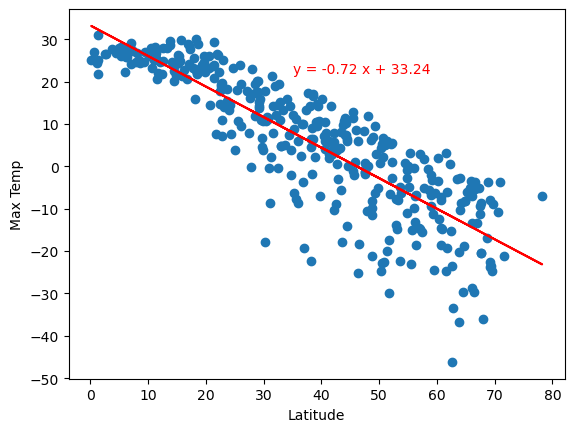

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(35,22))

The r-squared is: 0.6373316868013242


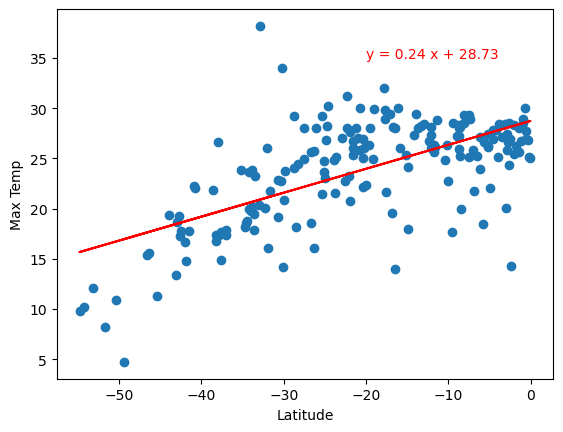

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp",(-20,35))

**Discussion about the linear relationship:**

The scatterplots for both hemispheres explain how weather varies with latitude. In the northern hemisphere, one could expect max temps to decrease as your latitude increases. Conversely, the temperatures increase in the southern hemisphere as you move closer to zero. The northern hemisphere has a strong negative correlation while the southern hemisphere has a weaker, positive correlation. The r^2 value in the northern hemisphere shows that nearly 86% of the data can be explained by the regression line.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4213034510559065


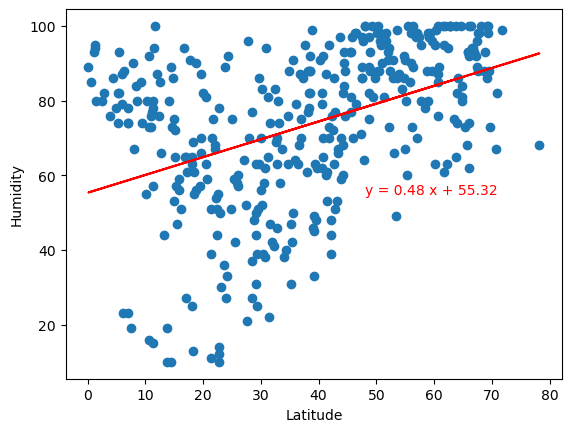

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity",(48,55))

The r-squared is: 0.3968700222765452


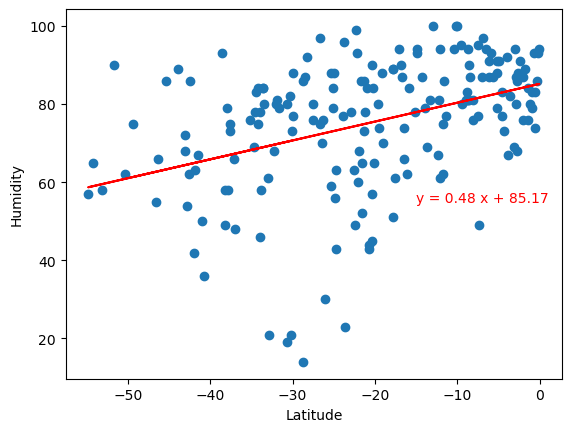

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity",(-15,55))

**Discussion about the linear relationship:** 

Both scatterplots comparing latitude to humidity have positive correlations. However, they both have much lower r^2 values compared to the two plots previously analyzed. Neither of the regression lines demonstrate a strong relationship between latitudes and humidity. One thought I had when looking at these plots was: rather than plotting latitude and humidity, what if it was altitude vs humidity?

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.35673105613922473


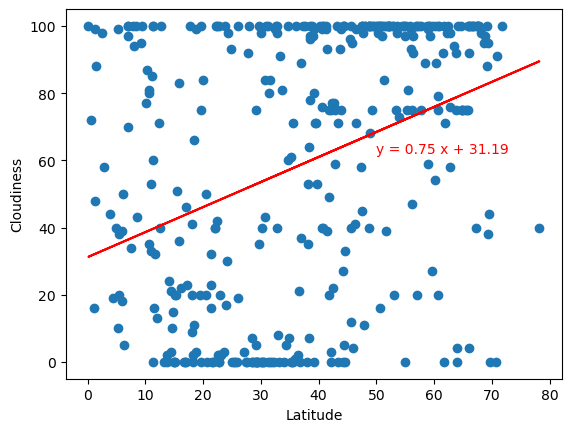

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness",(50,62))

The r-squared is: 0.16312089343171238


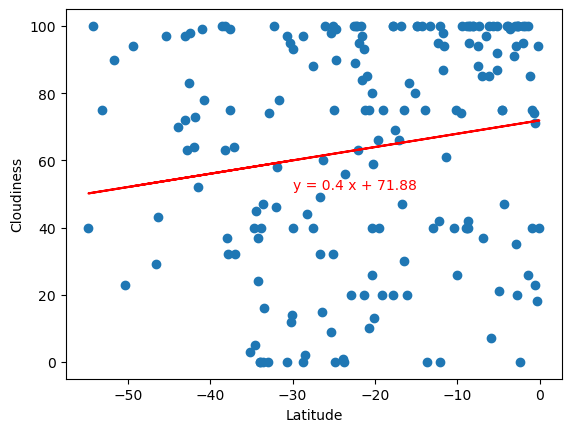

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness",(-30,51.5))

**Discussion about the linear relationship:** 

Similar to the analysis for the scatterplots comparing humidity to latitude, the scatterplots for cloudiness to latitude continue to have weaker coorelations amongst the data. In the southern hemisphere, the calculated r^2 value is roughly .163. Just a little more than 16% of our data can be explained by the regression line.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.05038739854134133


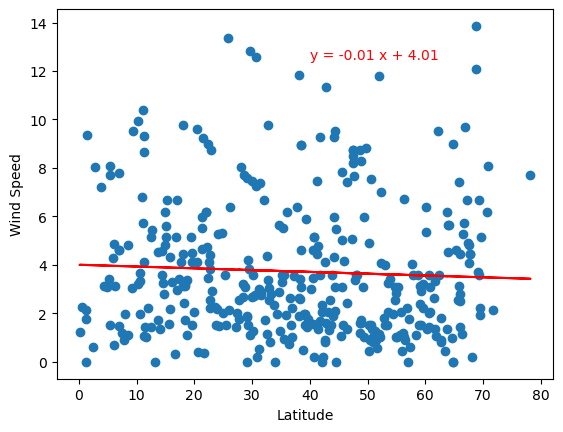

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(40,12.5))

The r-squared is: -0.18979875888665204


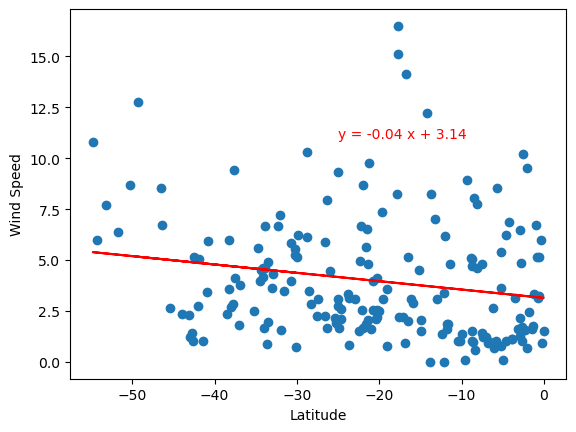

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed",(-25,11))

**Discussion about the linear relationship:**

Among the four different relationship pairs we plotted, the relationship between wind speed and latitude is certainly the weakest. In the northern hemisphere plot, the r^2 value is close to 5%. That means that 95% of our data cannot be explained by the regression line and are truly "scattered". Again, I believe that if we were able to pull elevation data from the api and use that as our independent variable, we would be able to get a better understanding of the data and how the two variable relate to each other.